In [8]:
import os
import pickle
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
from math import exp, sqrt, pi
from scipy.optimize import fsolve
from scipy.special import erf, erfc

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

with open('variabler.pkl', 'rb') as f:
    countries, ALP1, ALP2, ALP3, MDY, SY, RHO, SE, BSY, DY = pickle.load(f)

In [9]:
df = pd.DataFrame(countries, columns=['Country'], index=range(1, len(countries) + 1))
# display(df) # alle i en 
display(df[:13].T)
display(df[13:].T)

1        2        3       4        5        6       7   \
Country  Australia  Austria  Belgium  Canada  Denmark  Finland  France   

              8       9        10       11       12     13  
Country  Germany  Greece  Hungary  Iceland  Ireland  Italy

14           15           16      17        18     19      20  \
Country  Korea  Netherlands  New Zealand  Norway  Portugal  Spain  Sweden   

                  21              22             23  
Country  Switzerland  United Kingdom  United States

In [10]:
n = len(ALP1)
per = 4
Gs1_initial_guess = -1
r = 0.152335822311631; # 1980-2010
nd = 1000
D = np.linspace(0, 0.5, nd).reshape(-1, 1)

In [11]:
def solve_iid(z, sigma):
    cdf = (1 + erf(z / sqrt(2))) / 2
    pdf = exp(-z**2 / 2) / sqrt(2 * pi)
    res = sigma * (1 - cdf) - pdf
    return res

In [12]:
seg = {}
gbar1 = {}
gbar = {}
Gs1_so = {}
F1 = {}
Bm = {}
Dm = {}
zm = {}
Fm = {}
Rdm = {}
z = {}
cdf = {}
pdf = {}
CDF = {}
Rd = {}
Rpd = {}
LAFFER = {}

for i in range(0, len(ALP1)):
    alpha = 0.05
    seg[countries[i]] = SY[countries[i]]
    gbar1[countries[i]] = np.log(1+MDY[countries[i]])
    gbar[countries[i]] = per * gbar1[countries[i]]

    # Sandsynligvis en fejl her:
    Gs1_so[countries[i]] = fsolve(lambda Gs1: solve_iid(Gs1, seg[countries[i]]), Gs1_initial_guess)
    #Gs1_so[countries[i]] =-1.907872002195845

    F1[countries[i]] = (1+erf(Gs1_so[countries[i]]/sqrt(2)))/2

    Bm[countries[i]] = alpha * exp(gbar[countries[i]]+seg[countries[i]]*Gs1_so[countries[i]])*(1-F1[countries[i]])/(1+r-exp(gbar[countries[i]]+seg[countries[i]]*Gs1_so[countries[i]])*(1-F1[countries[i]]))

    Dm[countries[i]]= exp(gbar[countries[i]]+seg[countries[i]]*Gs1_so[countries[i]])*(alpha+Bm[countries[i]])

    zm[countries[i]] = (np.log( Dm[countries[i]] / ( alpha + Bm[countries[i]] ) ) -gbar[countries[i]] ) / seg[countries[i]]

    Fm[countries[i]] = (1+erf(zm[countries[i]]/sqrt(2)))/2

    Rdm[countries[i]] = (1+r)/(1-Fm[countries[i]])

    z[countries[i]] = (np.log(D/(alpha+Bm[countries[i]]))-gbar[countries[i]])/seg[countries[i]]


    cdf_values = np.zeros_like(z[countries[i]])  # Opret et tomt array med samme form som z_values
    
    for j in range(len(z[countries[i]])):
        cdf_values[j] = (1 + erf(z[countries[i]][j] / np.sqrt(2))) / 2
    
    # Gem CDF-resultater for landet
    cdf[countries[i]] = cdf_values

    pdf_values = np.zeros_like(z[countries[i]])  # Opret et tomt array med samme form som z_values
    
    for j in range(len(z[countries[i]])):
        pdf_values[j] = exp(-z[countries[i]][j]*z[countries[i]][j]/2)/sqrt(2*pi)
    
    pdf[countries[i]] = pdf_values

    CDF[countries[i]] = cdf[countries[i]]

    Rd[countries[i]]  = (1+r)/(1-cdf[countries[i]])

    Rpd[countries[i]] = (1+r)*pdf[countries[i]]/(seg[countries[i]]*(1-cdf[countries[i]])*(1-cdf[countries[i]])*D)
    
    LAFFER[countries[i]]= (1-cdf[countries[i]])*D/(1+r)

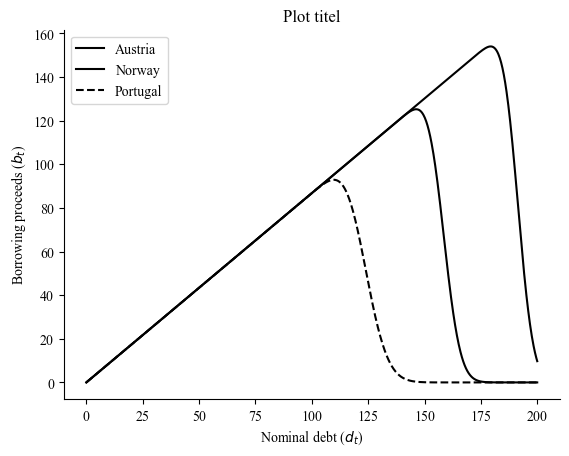

<Figure size 1000x600 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

# Initialiser tomme lister til x- og y-koordinater
x_values = []
y_values = []

# Gennemgå i værdierne 6 og 8
for i in [1,16,17]:
    x = 100 * per * D
    y = 100 * per * LAFFER[countries[i]]
    
    # Tilføj x og y værdier til de respektive lister
    x_values.append(x)
    y_values.append(y)
    
    # Plot linjen med passende farve og stil
    label = f'{countries[i]}'
    color = 'black' if i <= 16 else 'black'
    linestyle = '--' if i > 16 else '-'
    
    plt.plot(x, y, label=label, color=color, linestyle=linestyle)

plt.xlabel('x-akse label', fontname='Times New Roman')
plt.ylabel('y-akse label', fontname='Times New Roman')
plt.title('Plot titel', fontname='Times New Roman')
plt.xticks(fontname='Times New Roman')
plt.yticks(fontname='Times New Roman')
plt.legend(prop={'family': 'Times New Roman'})
# Tilføj aksetitler og en titel til plottet
plt.xlabel('Nominal debt ($d_t$)')
plt.ylabel('Borrowing proceeds ($b_t$)')
plt.title('Plot titel')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Tilføj en legende

plt.figure(figsize=(10,6))
# Vis plottet
plt.show()

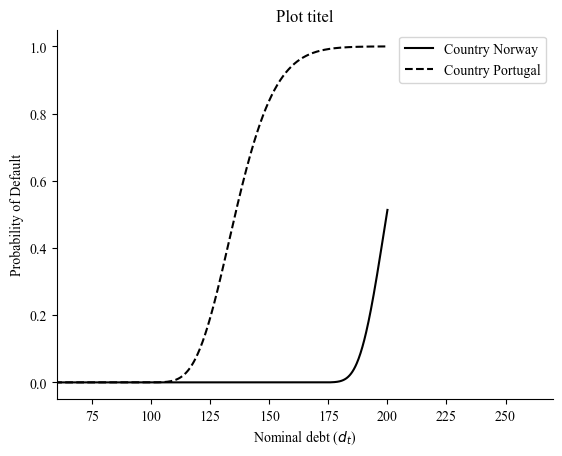

<Figure size 1000x600 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

# Initialiser tomme lister til x- og y-koordinater
x_values = []
y_values = []

# Gennemgå i værdierne 6 og 8
for i in [16,17]:
    x = 100 * per * D
    y = 1-(1-CDF[countries[i]]) ** (1/per)
    
    # Tilføj x og y værdier til de respektive lister
    x_values.append(x)
    y_values.append(y)
    
    label = f'Country {countries[i]}'
    color = 'black' if i <= 16 else 'black'
    linestyle = '--' if i > 16 else '-'
    
    plt.plot(x, y, label=label, color=color, linestyle=linestyle)

plt.xlabel('x-akse label', fontname='Times New Roman')
plt.ylabel('y-akse label', fontname='Times New Roman')
plt.title('Plot titel', fontname='Times New Roman')

# Tilføj aksetitler og en titel til plottet
plt.xlabel('Nominal debt ($d_t$)')
plt.ylabel('Probability of Default')
plt.title('Plot titel')
plt.xticks(fontname='Times New Roman')
plt.yticks(fontname='Times New Roman')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim([60, 270])
# Tilføj en legende
plt.legend(prop={'family': 'Times New Roman'})

plt.figure(figsize=(10,6))
# Vis plottet
plt.show()
